In [1]:
# Some imports
import numpy as np
import matplotlib.pyplot as plt
import scipy.special

The Hamiltonian of the Cooper box is given by
$$
H = E_C \sum_N (N-N_g)^2 |N \rangle \langle N |
- 
\frac{1}{2}E_0 \sum_N
\big[
|N+1\rangle \langle N| +  |N-1\rangle \langle N|
\big]
$$
For simplicity, we set $E_C = 1$ and measure all energies relative to $E_C$. The following function calculates the eigenvalues of the Hamiltonian with $E_0 = 0$.


In [2]:
####################################################
# Return the energy eigenvalues of the unperturbed #
# Hamiltonian (the diagonal part)                  #
####################################################
def E0(N, Ng):
    return (N-Ng)**2



Now we plot the eigenvalues for different values of $N_g$. We plot three curves, corresponding to N=-1,0,1

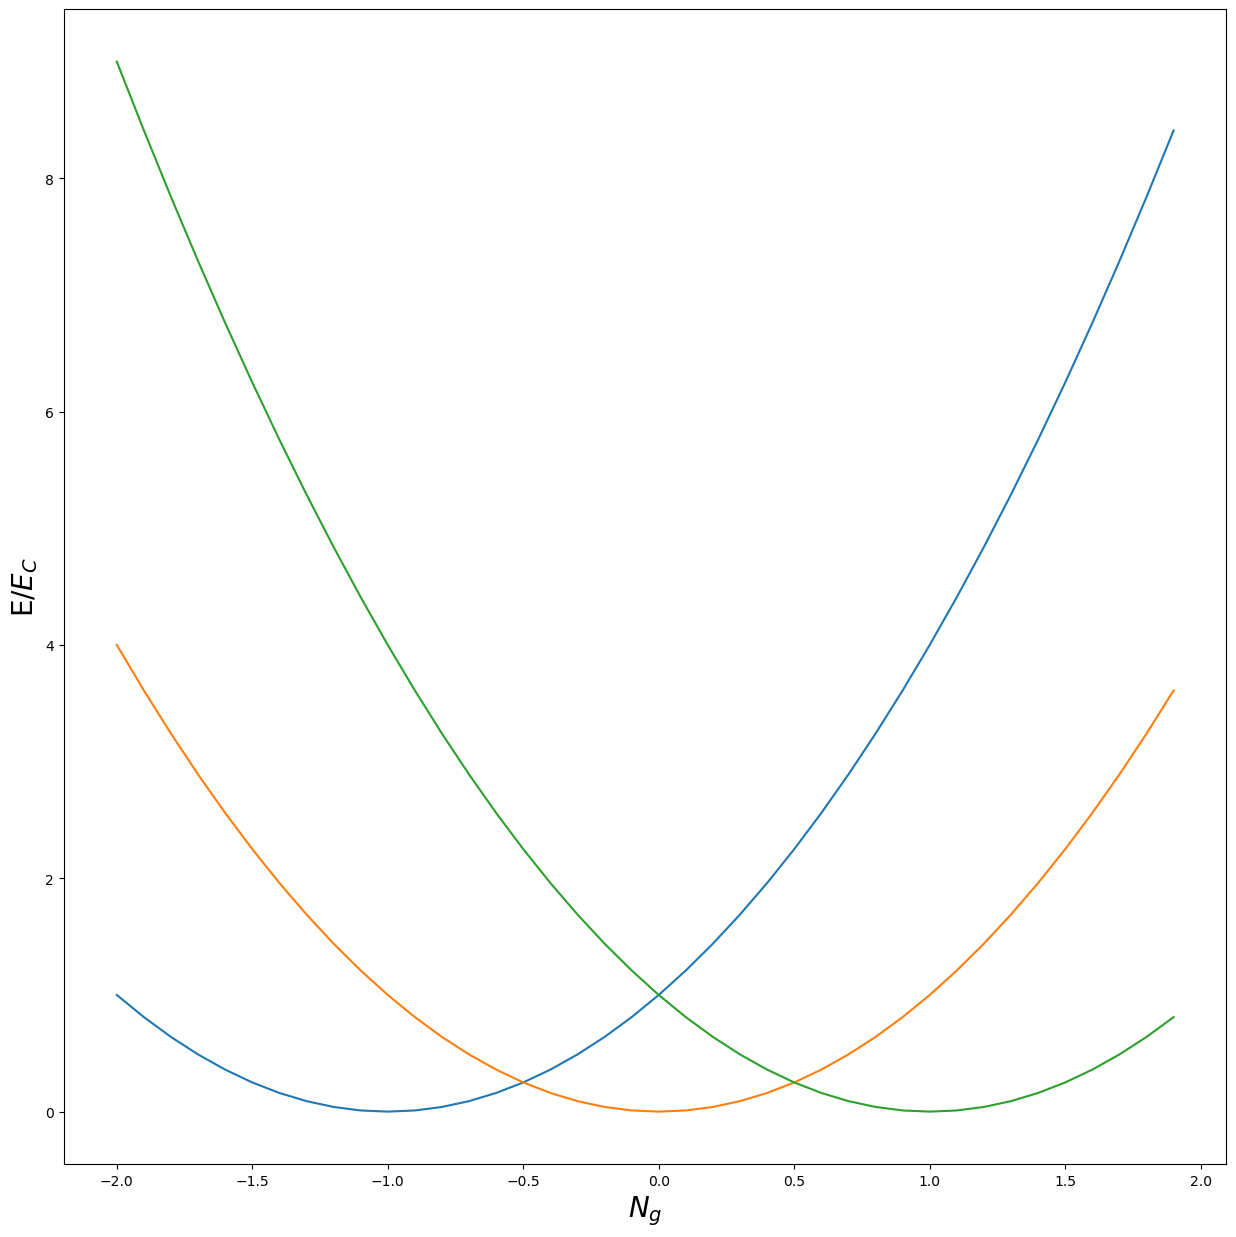

In [3]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
R = np.arange(-2,2,0.1)
ax.plot(R,E0(-1,R))
ax.plot(R,E0(0,R))
ax.plot(R,E0(1,R))
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)
plt.show()

We now study the behaviour for non-zero values of $E_0$. To do this, we approximate the Hamiltonian by the Hamiltonian on a finite subspace. This is a hermitian matrix for which we can find the eigenvalues using standard methods. More specifically, we introduce the parameter prec and restrict the Hamiltonian to the subspace of dimension $2*prec + 1$ spanned by the vectors $|n\rangle$ with $-prec \leq n \leq prec$.

In [4]:
#######################################################
# Return a finite part of the Hamiltonian             #
# prec = precision                                    #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def hamiltonian(Ec,E0,Ng,prec=10):
    H0 = Ec * np.diag((np.arange(-prec, prec+1)-Ng)**2, 0)
    V = -0.5*E0 * np.diag(np.ones(2*prec),1)   -0.5*E0 * np.diag(np.ones(2*prec),-1)
    return H0 + V

In [5]:
#######################################################
# Return an approximation of the n-th energy          #
# E0 = energy of Josephson junction                   #
# Ec = characteristic energy of capacitors            #
# Ng = gate voltage                                   #
#######################################################
def solve(Ec,E0,Ng,n, prec=10):
    H = hamiltonian(Ec, E0, Ng, prec)
    E, v = np.linalg.eig(H)
    s = np.argsort(E)
    return E[s[n]], v[:,s[n]], H


Now we again plot the first few eigenvalues

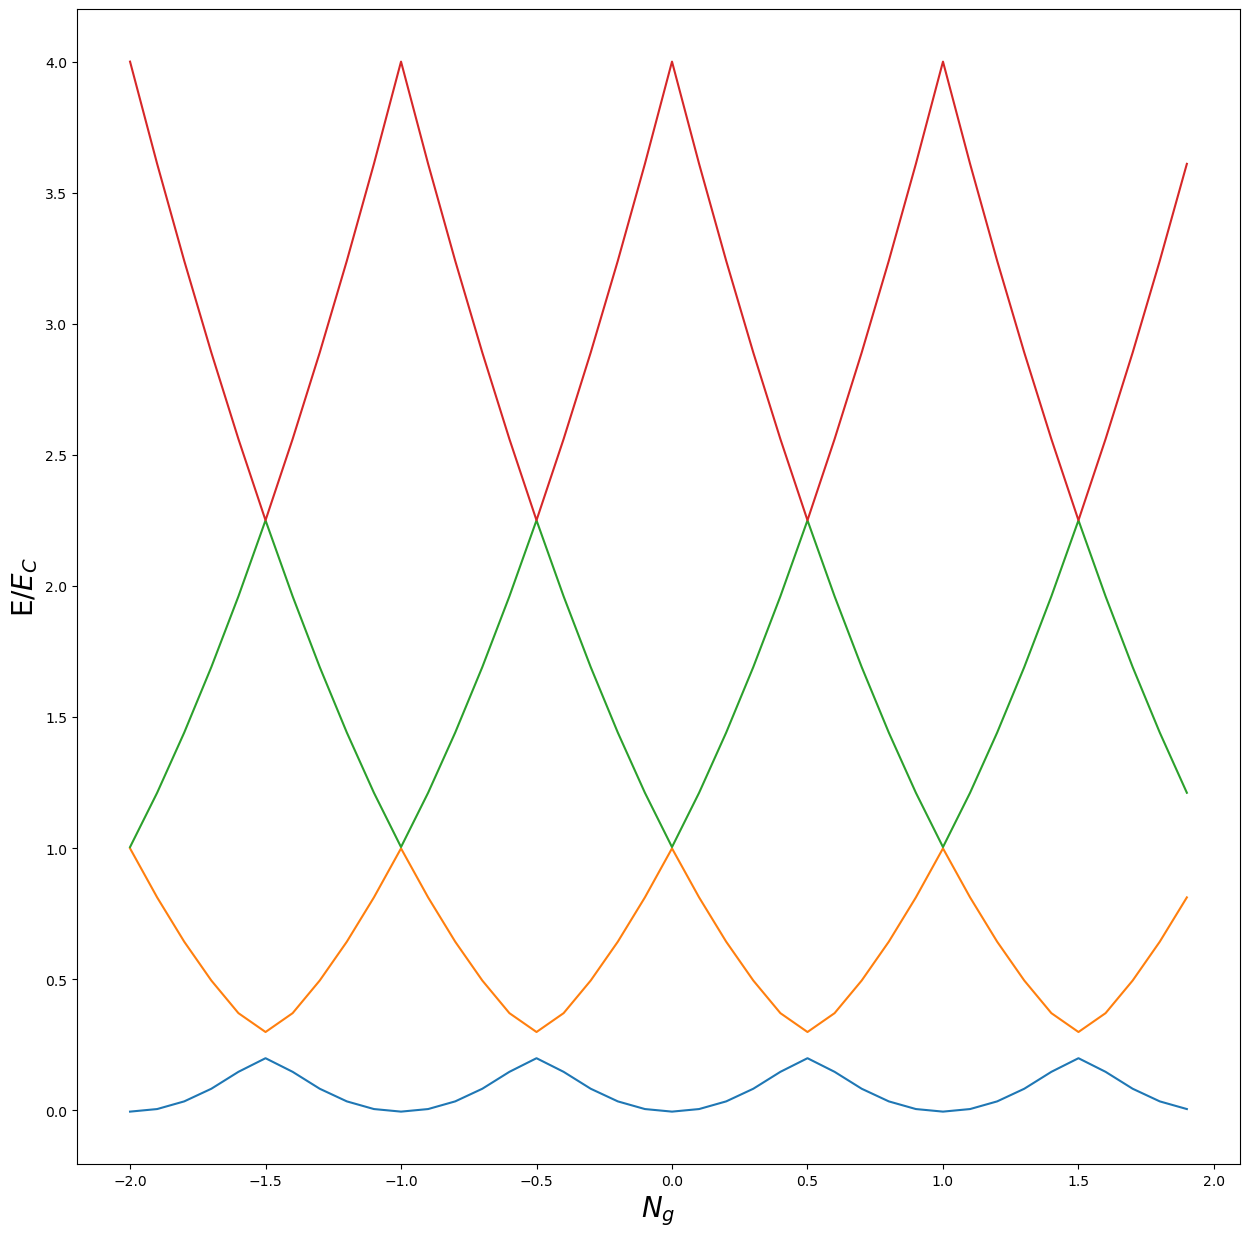

In [6]:
#########################################
# Plot the n-th eigenvalue depending on #
# the array R with Ng-values            #
#########################################
def plot(axis, E0, R,n, prec=10):
    y = []
    for r in R:
        E,_,_ = solve(1, E0, r, n, prec=prec)
        y.append(E)
    axis.plot(R,y)



fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,1,1)
E0 = 0.1
prec = 5
plot(ax, E0=E0, R=R, n=0, prec=prec)
plot(ax, E0=E0, R=R, n=1, prec=prec)
plot(ax, E0=E0, R=R, n=2, prec=prec)
plot(ax, E0=E0, R=R, n=3, prec=prec)
ax.set_ylabel("E/$E_C$",fontsize=20)
ax.set_xlabel("$N_g$", fontsize=20)


plt.show()

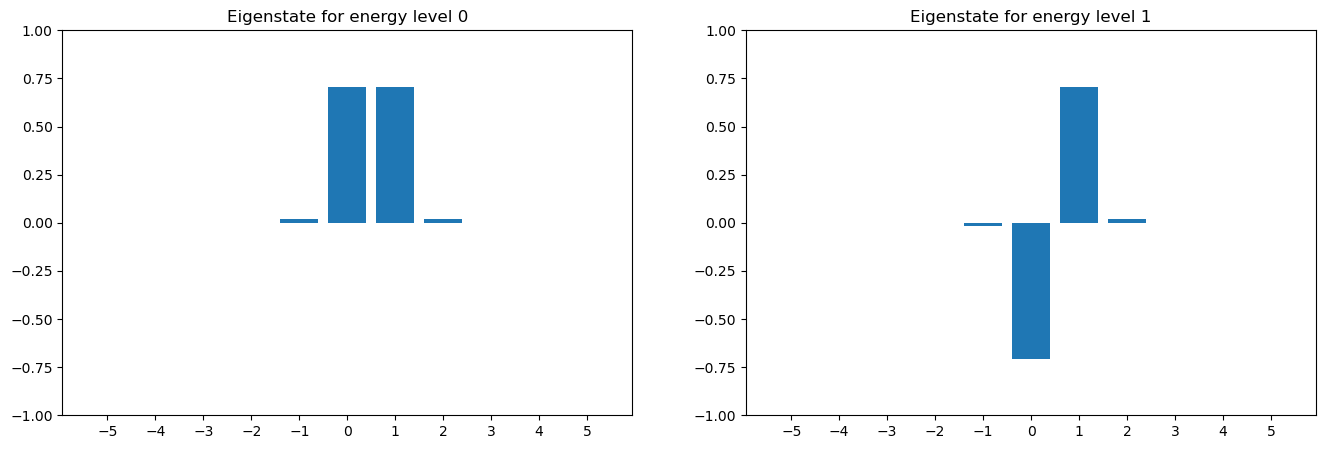

In [7]:
#####################################################
# Now plot the eigenstates in the N-representation  #
# at the point Ng                                   #
#####################################################
Ng = 0.5
fig = plt.figure(figsize=(25,5))
vectors = 2
for i in range(vectors):
    ax = fig.add_subplot(1,vectors+1,i+1)
    E,v,H = solve(1, E0=E0, Ng=Ng, n = i, prec=prec)
    v = v / np.linalg.norm(v)
    ax.bar(range(-prec,prec+1), v)
    ax.set_ylim(-1, 1)
    ax.set_xticks(range(-prec,prec+1))
    ax.set_title("Eigenstate for energy level "+str(i))


plt.show()

# OWN

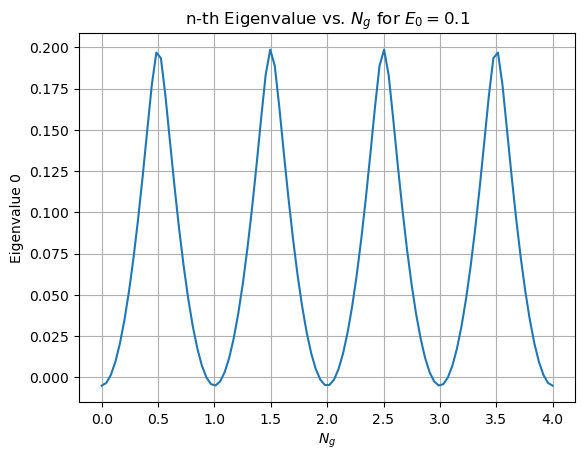

In [8]:
import numpy as np
import scipy.linalg as la
import matplotlib.pyplot as plt

def cooper_box_hamiltonian(N_max, N_g, E_0):
    """
    Construct and solve the Hamiltonian of a Cooper box.
    
    Parameters:
    N_max (int): Maximum number of charge states to consider.
    N_g (float): Gate charge.
    E_0 (float): Josephson energy.
    
    Returns:
    eigenvalues (ndarray): Eigenvalues of the Hamiltonian.
    """
    size = 2 * N_max + 1
    H = np.zeros((size, size))
    
    for N in range(-N_max, N_max + 1):
        i = N + N_max  # Map N to matrix index
        
        # Diagonal term
        H[i, i] = (N - N_g) ** 2
        
        # Off-diagonal terms
        if i + 1 < size:
            H[i, i + 1] = -0.5 * E_0
            H[i + 1, i] = -0.5 * E_0
    
    eigenvalues = la.eigvalsh(H)
    return eigenvalues

# Parameters
N_max = 10  # Number of charge states to consider on each side of 0
E_0 = 0.1  # Josephson energy
R = np.linspace(0, 4, 100)  # Array of Ng values
n = 0  # Index of the eigenvalue to plot (0 for the lowest eigenvalue)

# Calculate the n-th eigenvalue for each Ng
eigenvalues_n = []

for N_g in R:
    eigenvalues = cooper_box_hamiltonian(N_max, N_g, E_0)
    eigenvalues_n.append(eigenvalues[n])

# Plotting
plt.plot(R, eigenvalues_n)
plt.xlabel('$N_g$')
plt.ylabel(f'Eigenvalue {n}')
plt.title(f'n-th Eigenvalue vs. $N_g$ for $E_0 = {E_0}$')
plt.grid(True)
plt.show()


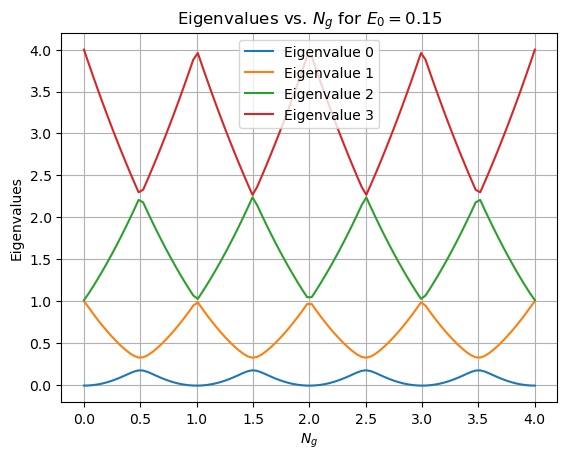

In [9]:
# Parameters
N_max = 10  # Number of charge states to consider on each side of 0
E_0 = 0.15  # Josephson energy
R = np.linspace(0, 4, 100)  # Array of Ng values
n_values = [0, 1, 2, 3]  # Indices of the eigenvalues to plot

# Initialize a dictionary to hold eigenvalues for different n
eigenvalues_dict = {n: [] for n in n_values}

# Calculate the n-th eigenvalue for each Ng
for N_g in R:
    eigenvalues = cooper_box_hamiltonian(N_max, N_g, E_0)
    for n in n_values:
        eigenvalues_dict[n].append(eigenvalues[n])

# Plotting
for n in n_values:
    plt.plot(R, eigenvalues_dict[n], label=f'Eigenvalue {n}')

plt.xlabel('$N_g$')
plt.ylabel('Eigenvalues')
plt.title(f'Eigenvalues vs. $N_g$ for $E_0 = {E_0}$')
plt.legend()
plt.grid(True)
plt.show()

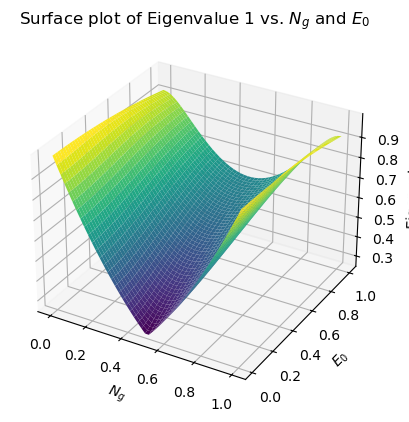

In [13]:
from mpl_toolkits.mplot3d import Axes3D

# Parameters
N_max = 10
N_g_values = np.linspace(0, 1, 50)
E_0_values = np.linspace(0.01, 1, 50)
n = 1  # Index of the eigenvalue to plot

# Calculate eigenvalues for each combination of Ng and E_0
eigenvalues_surface = np.zeros((len(N_g_values), len(E_0_values)))

for i, N_g in enumerate(N_g_values):
    for j, E_0 in enumerate(E_0_values):
        eigenvalues = cooper_box_hamiltonian(N_max, N_g, E_0)
        eigenvalues_surface[i, j] = eigenvalues[n]

# Plotting
N_g_grid, E_0_grid = np.meshgrid(N_g_values, E_0_values)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
#ax.plot_surface(N_g_grid, E_0_grid, eigenvalues_surface.T, cmap='viridis')
ax.plot_surface(N_g_grid, E_0_grid, eigenvalues_surface.T, cmap='viridis')

ax.set_xlabel('$N_g$')
ax.set_ylabel('$E_0$')
ax.set_zlabel(f'Eigenvalue {n}')
ax.set_title(f'Surface plot of Eigenvalue {n} vs. $N_g$ and $E_0$')
plt.show()


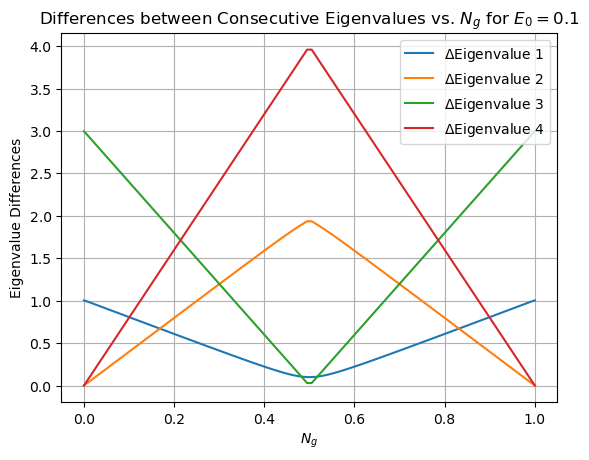

In [14]:
# Parameters
N_max = 10
E_0 = 0.1
R = np.linspace(0, 1, 100)
n_max = 5  # Number of eigenvalues to consider

# Calculate eigenvalue differences for each Ng
eigenvalue_diffs = {n: [] for n in range(1, n_max)}

for N_g in R:
    eigenvalues = cooper_box_hamiltonian(N_max, N_g, E_0)
    for n in range(1, n_max):
        eigenvalue_diffs[n].append(eigenvalues[n] - eigenvalues[n - 1])

# Plotting
for n in range(1, n_max):
    plt.plot(R, eigenvalue_diffs[n], label=f'$\Delta$Eigenvalue {n}')

plt.xlabel('$N_g$')
plt.ylabel('Eigenvalue Differences')
plt.title(f'Differences between Consecutive Eigenvalues vs. $N_g$ for $E_0 = {E_0}$')
plt.legend()
plt.grid(True)
plt.show()
